In [44]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

In [9]:
words = open('names.txt','r').read().splitlines()

In [10]:
words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [11]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1,ch2 in zip(chs,chs[1:]):
    bigram = (ch1,ch2)
    b[bigram] = b.get(bigram,0) + 1

In [12]:
sorted(b.items(), key= lambda kv : -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [14]:
N = torch.zeros((27,27), dtype= torch.int32)

In [15]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

In [16]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1,ix2] += 1

In [17]:
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [18]:
N[0,:]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [19]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [20]:
g = torch.Generator().manual_seed(2147483647)
torch.multinomial(p, num_samples=100, replacement=True, generator=g, out=None)

tensor([13, 19, 14,  1,  1, 20, 20,  1, 13, 13, 13, 11, 23, 13, 19, 18, 26, 11,
         7, 19,  1, 11, 18, 10, 11, 15,  2,  9, 18,  2,  5,  3,  1, 13, 11, 11,
        22, 11, 15, 26,  2, 18, 13, 10,  1, 15,  2,  3, 15, 10, 12,  4,  9,  3,
         4,  6,  4, 19, 10,  3,  8,  4, 10, 13, 14, 13, 10, 19, 11,  8, 13,  5,
         5,  6, 25, 20, 10, 18,  1,  8,  3,  2, 20,  1,  1,  3, 10, 11, 25, 18,
         1,  9, 11,  8, 12,  3, 12, 19,  9, 18])

In [21]:
p.shape

torch.Size([27])

In [22]:
P = (N+1).float()
P.shape

torch.Size([27, 27])

In [23]:
P.sum(axis=1,keepdim=True).shape

torch.Size([27, 1])

In [24]:
P = P / P.sum(axis=1,keepdim=True)

In [25]:
P[0]

tensor([3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
        1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
        4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
        5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
        4.2109e-03, 1.6719e-02, 2.9008e-02])

In [26]:
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g, out=None).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [27]:
log_likelyhood = 0.0
n = 0

for w in words[:]:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1,ix2]
    logprob = torch.log(prob)
    log_likelyhood += logprob
    n+=1
    #print(f'{ch1}{ch2} : {logprob:.4f}')

print(f'{log_likelyhood}')
# negative log likelyhood
nll = -log_likelyhood
nll/n

-559951.5625


tensor(2.4544)

In [28]:
# Now let's move it to neural network architecture

In [29]:
# Creating the dataset
xs = []
ys = []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
xs,ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [30]:
xs.dtype

torch.int64

In [31]:
ys.dtype

torch.int64

In [32]:
import torch.nn.functional as F
xenc = F.one_hot(xs,num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [33]:
xenc.shape

torch.Size([5, 27])

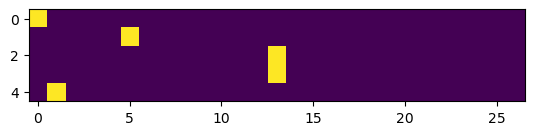

In [34]:
plt.imshow(xenc)

In [35]:
xenc.dtype

torch.float32

In [36]:
W = torch.randn((27,27))
xenc @ W

tensor([[-0.4569, -0.5427, -0.3889, -1.1013,  0.1571,  0.4267,  0.2200,  0.1696,
          0.4656, -0.6210,  0.9196, -0.1576,  1.0963, -0.1006, -0.0117,  0.5064,
          0.4346, -0.0985,  0.7065,  0.7082,  0.2864,  1.0428,  1.1286,  1.1441,
          1.7435,  0.2052, -0.4008],
        [-0.6776, -1.2037,  0.7157,  0.4635,  0.7155, -1.6171, -1.8717,  0.9403,
          0.4628,  1.3181, -1.5472,  0.8245,  1.5096,  1.1252, -0.9923,  0.6675,
         -0.6119,  0.6391, -1.0097,  0.7166,  2.1526,  0.1760,  0.4525,  0.8676,
          0.1626,  0.6894, -0.6792],
        [ 1.2142, -0.5177,  0.3149, -0.7104, -2.0467,  1.0155, -1.2647,  0.3875,
         -0.2596, -0.4176,  1.6678,  1.1586,  0.9210,  0.2936, -0.6360, -0.9375,
          0.9288, -0.4116, -0.5083,  1.1300, -0.3218,  0.0465,  0.6226, -0.0181,
          0.2220, -0.1485,  0.4966],
        [ 1.2142, -0.5177,  0.3149, -0.7104, -2.0467,  1.0155, -1.2647,  0.3875,
         -0.2596, -0.4176,  1.6678,  1.1586,  0.9210,  0.2936, -0.6360, -0.9375

In [37]:
(xenc @ W)[3,13]

tensor(0.2936)

In [38]:
(xenc[3] * W[13]).sum()

tensor(0.2936)

In [41]:
logits = (xenc @ W)
counts = logits.exp()
prob = counts / counts.sum(1,keepdim=True)
prob

tensor([[0.0144, 0.0132, 0.0154, 0.0076, 0.0266, 0.0349, 0.0284, 0.0270, 0.0363,
         0.0122, 0.0571, 0.0194, 0.0682, 0.0206, 0.0225, 0.0378, 0.0352, 0.0206,
         0.0462, 0.0462, 0.0303, 0.0646, 0.0704, 0.0715, 0.1302, 0.0280, 0.0153],
        [0.0103, 0.0061, 0.0414, 0.0322, 0.0414, 0.0040, 0.0031, 0.0518, 0.0321,
         0.0756, 0.0043, 0.0461, 0.0916, 0.0623, 0.0075, 0.0394, 0.0110, 0.0383,
         0.0074, 0.0414, 0.1741, 0.0241, 0.0318, 0.0482, 0.0238, 0.0403, 0.0103],
        [0.0833, 0.0147, 0.0339, 0.0122, 0.0032, 0.0683, 0.0070, 0.0364, 0.0191,
         0.0163, 0.1311, 0.0788, 0.0621, 0.0332, 0.0131, 0.0097, 0.0626, 0.0164,
         0.0149, 0.0766, 0.0179, 0.0259, 0.0461, 0.0243, 0.0309, 0.0213, 0.0406],
        [0.0833, 0.0147, 0.0339, 0.0122, 0.0032, 0.0683, 0.0070, 0.0364, 0.0191,
         0.0163, 0.1311, 0.0788, 0.0621, 0.0332, 0.0131, 0.0097, 0.0626, 0.0164,
         0.0149, 0.0766, 0.0179, 0.0259, 0.0461, 0.0243, 0.0309, 0.0213, 0.0406],
        [0.0092, 0.1157,

In [42]:
prob[0]

tensor([0.0144, 0.0132, 0.0154, 0.0076, 0.0266, 0.0349, 0.0284, 0.0270, 0.0363,
        0.0122, 0.0571, 0.0194, 0.0682, 0.0206, 0.0225, 0.0378, 0.0352, 0.0206,
        0.0462, 0.0462, 0.0303, 0.0646, 0.0704, 0.0715, 0.1302, 0.0280, 0.0153])

In [47]:
g = torch.Generator().manual_seed(2147483647)
w = torch.randn((27,27),generator=g)

In [48]:
xenc = F.one_hot(xs,num_classes=27).float()
logits = (xenc @ w)
counts = logits.exp()
prob = counts / counts.sum(1,keepdim=True)
prob

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [49]:
prob.shape

torch.Size([5, 27])

In [197]:
# OPTIMIZATION

In [198]:
xs

tensor([ 0,  5, 13, 13,  1])

In [199]:
ys

tensor([ 5, 13, 13,  1,  0])

In [200]:
g = torch.Generator().manual_seed(2147483647)
w = torch.randn((27,27),generator=g,requires_grad=True)

In [210]:
for i in range(10):
    # forward pass
    xenc = F.one_hot(xs,num_classes=27).float()
    logits = (xenc @ w)
    counts = logits.exp()
    probs = counts / counts.sum(1,keepdim=True)
    loss = -1 * probs[torch.arange(5), ys].log().mean() + 0.01 * (w**2).mean()

    # backward pass
    w.grad = None
    loss.backward()
    w.data += (-1 * w.grad)
    print(loss.item())

0.6576290726661682
0.6370694041252136
0.6183692812919617
0.6013181209564209
0.5857316255569458
0.5714488625526428
0.5583285093307495
0.5462474226951599
0.5350973606109619
0.5247834920883179


In [211]:
(xenc @ w)[1].argmax()
itos[13]

'm'

In [212]:
# Let's sample now

g = torch.Generator().manual_seed(2147483647)
out = []
for i in range(5):
    
    ix = 0
    
    while True:
        xenc = F.one_hot(torch.tensor([ix]),num_classes=27).float()
        logits = (xenc @ w)
        counts = logits.exp()
        probs = counts / counts.sum(1,keepdim=True)
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g, out=None).item()
        out.append(itos[ix])
        if ix == 0:
            break
print(''.join(out))

euwjdjdja.ema.opxjqyywema.ema.emmtozia.
